# Craft a Story from a Dataset Exercise

1. Select a dataset - any dataset! Make sure it's not too dirty, as this case study is
about storytelling, not cleaning... :)
    - Dataset: Music & Mental Health Survey Results
    - Link to datset: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results?resource=download
2. Pick your audience: executive, technical, or non-technical; and adjust your tone
accordingly.
    - __
4. Take a look at the data: explore it.
5. Think of a narrative, and pursue it.
6. Give a 15 mins presentation to your mentor during your next call.

In your quest, you might need to ask a bunch of other questions, such as:
- Can I count something interesting?
- Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
- Can I make a bar plot or a histogram?
- Can I compare two related quantities?
- Can I make a scatterplot?
- Can I make a time-series plot?
- Looking at the plots, what are some insights I can make?
- Can I see any correlations?
- Is there a hypothesis I can - and should - investigate further?
- What other questions are the insights leading me to ask?

Submission: Submit links to a GitHub repository containing a Jupyter Notebook or a
PowerPoint. The file should contain:
- The questions you asked
- The trends you investigated
- The resulting visualizations and conclusions

## About the dataset:
(From the kaggle source)

The MxMH dataset aims to identify what, if any, correlations exist between an individual's music taste and their self-reported mental health.

Block 0: Background

Respondents answer generic questions focused on musical background and listening habits.
Block 1: Music genres

Respondents rank how often they listen to 16 music genres, where they can select:

    Never
    Rarely
    Sometimes
    Very frequently

Block 2: Mental health

Respondents rank Anxiety, Depression, Insomnia, and OCD on a scale of 0 to 10, where:

    0 - I do not experience this.
    10 - I experience this regularly, constantly/or to an extreme.


## Column Descriptions

- Timestamp
    - Date and time when form was submitted
- Age
    - Respondent's age
- Primary streaming service
    - Respondent's primary streaming service
- Hours per day
    - Number of hours the respondent listens to music per day
- While working
    - Does the respondent listen to music while studying/working?
- Instrumentalist
    - Does the respondent play an instrument regularly?
- Composer
    - Does the respondent compose music?
- Fav genre
    - Respondent's favorite or top genre
- Exploratory
    - Does the respondent actively explore new artists/genres?
- Foreign languages
    - Does the respondent regularly listen to music with lyrics in a language they are not fluent in?
- BPM
    - Beats per minute of favorite genre
    - Interesting article on bpm limits: https://boilerroom.tv/article/extreme-bpms
- Frequency [...] (16 cols)
    - How frequently the respondent listens to ... music
- [Mental health] (4 cols)
    - self-reported scale of 0 to 10
-  Music effects
    - Does music improve/worsen respondent's mental health conditions?
- Permissions
    - Permissions to publicize data

# Imports

In [1]:
%matplotlib inline

#data manipulation and math

import numpy as np
import scipy as sp
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

#plotting and visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset

In [2]:
df_mxmh = pd.read_csv('mxmh_survey_results.csv')
df_mxmh.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


## Edit col names to all lowercase & replace whitespace with underscore

In [3]:
df_mxmh.columns = df_mxmh.columns.str.lower()
print(df_mxmh.columns)

Index(['timestamp', 'age', 'primary streaming service', 'hours per day',
       'while working', 'instrumentalist', 'composer', 'fav genre',
       'exploratory', 'foreign languages', 'bpm', 'frequency [classical]',
       'frequency [country]', 'frequency [edm]', 'frequency [folk]',
       'frequency [gospel]', 'frequency [hip hop]', 'frequency [jazz]',
       'frequency [k pop]', 'frequency [latin]', 'frequency [lofi]',
       'frequency [metal]', 'frequency [pop]', 'frequency [r&b]',
       'frequency [rap]', 'frequency [rock]', 'frequency [video game music]',
       'anxiety', 'depression', 'insomnia', 'ocd', 'music effects',
       'permissions'],
      dtype='object')


In [4]:
df_mxmh.columns = df_mxmh.columns.str.replace(' ', '_')
print(df_mxmh.columns)

Index(['timestamp', 'age', 'primary_streaming_service', 'hours_per_day',
       'while_working', 'instrumentalist', 'composer', 'fav_genre',
       'exploratory', 'foreign_languages', 'bpm', 'frequency_[classical]',
       'frequency_[country]', 'frequency_[edm]', 'frequency_[folk]',
       'frequency_[gospel]', 'frequency_[hip_hop]', 'frequency_[jazz]',
       'frequency_[k_pop]', 'frequency_[latin]', 'frequency_[lofi]',
       'frequency_[metal]', 'frequency_[pop]', 'frequency_[r&b]',
       'frequency_[rap]', 'frequency_[rock]', 'frequency_[video_game_music]',
       'anxiety', 'depression', 'insomnia', 'ocd', 'music_effects',
       'permissions'],
      dtype='object')


## Explore the dataframe

In [5]:
print(df_mxmh.info())
print('\n')
print(f'shape:\n{df_mxmh.shape[1]} columns\n{df_mxmh.shape[0]} rows')
print('\n')
print('Count of unique values per column:')
print(df_mxmh.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     736 non-null    object 
 1   age                           735 non-null    float64
 2   primary_streaming_service     735 non-null    object 
 3   hours_per_day                 736 non-null    float64
 4   while_working                 733 non-null    object 
 5   instrumentalist               732 non-null    object 
 6   composer                      735 non-null    object 
 7   fav_genre                     736 non-null    object 
 8   exploratory                   736 non-null    object 
 9   foreign_languages             732 non-null    object 
 10  bpm                           629 non-null    float64
 11  frequency_[classical]         736 non-null    object 
 12  frequency_[country]           736 non-null    object 
 13  frequ

## Drop unnecessary cols
    timestamp & permissions

In [58]:
df_mxmh.drop(['timestamp', 'permissions'], axis=1, inplace=True)
list(df_mxmh.columns)

KeyError: "['timestamp', 'permissions'] not found in axis"

# Wrangling

## Outlier detection
- Box plots

In [ ]:
sns.boxplot(df_mxmh)

BPM seems to have an extreme outlier

### BPM

In [23]:
#Calculate mean BPM for each genre

genre_means = df_mxmh.groupby('fav_genre')['bpm'].mean().map('{:2f}'.format)
    #format cuz it does scientific notation otherwise
print(f'Genre Means: {genre_means}')

print()

#Calculate median BPM for each genre
genre_median = df_mxmh.groupby('fav_genre')['bpm'].median()
genre_median = round(genre_median, 0)
print()
print(f'Genre Medians: {genre_median}')

Genre Means: fav_genre
Classical                114.575000
Country                  110.190476
EDM                      147.500000
Folk                     109.538462
Gospel                    89.250000
Hip hop                  111.906250
Jazz                     124.473684
K pop                    128.560000
Latin                    133.666667
Lofi                     114.300000
Metal                    139.102564
Pop                      118.907216
R&B                      114.166667
Rap                      127.100000
Rock                     124.052980
Video game music    27027143.513514
Name: bpm, dtype: object


Genre Medians: fav_genre
Classical           118.0
Country             109.0
EDM                 132.0
Folk                114.0
Gospel               88.0
Hip hop             112.0
Jazz                120.0
K pop               124.0
Latin               156.0
Lofi                104.0
Metal               140.0
Pop                 120.0
R&B                 116.0
Rap        

AP: I'm planning on using the median for any imputation I may perform. Less affected by outliers (high & low)

In [24]:
# bpm top 10 largest values & get idea of quantity of occurences
df_mxmh.nlargest(5, columns='bpm', keep='all')

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,frequency_[classical],frequency_[country],frequency_[edm],frequency_[folk],frequency_[gospel],frequency_[hip_hop],frequency_[jazz],frequency_[k_pop],frequency_[latin],frequency_[lofi],frequency_[metal],frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],anxiety,depression,insomnia,ocd,music_effects
568,16.0,Spotify,7.0,Yes,No,No,Video game music,Yes,No,999999999.0,Never,Rarely,Sometimes,Rarely,Never,Rarely,Rarely,Never,Never,Never,Very frequently,Sometimes,Never,Very frequently,Rarely,Sometimes,4.0,8.0,8.0,4.0,No effect
644,16.0,Other streaming service,4.0,Yes,No,No,EDM,Yes,Yes,624.0,Sometimes,Never,Very frequently,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Sometimes,4.0,7.0,1.0,3.0,Improve
248,20.0,Spotify,2.0,No,Yes,Yes,Metal,No,Yes,220.0,Rarely,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Very frequently,Never,Never,Rarely,Sometimes,Rarely,0.0,0.0,0.0,1.0,No effect
610,56.0,I do not use a streaming service.,2.0,Yes,No,No,Rock,No,Yes,220.0,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Never,Very frequently,Never,Never,Rarely,Very frequently,Never,3.0,3.0,1.0,8.0,No effect
662,32.0,Spotify,1.0,Yes,No,No,Metal,Yes,Yes,218.0,Sometimes,Sometimes,Sometimes,Sometimes,Never,Rarely,Never,Very frequently,Rarely,Never,Very frequently,Rarely,Rarely,Sometimes,Very frequently,Rarely,6.0,8.0,7.0,0.0,Improve


In [25]:
# bpm top 10 smallest values & get idea of quantity of occurences
df_mxmh.nsmallest(10, columns='bpm', keep='all')

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,frequency_[classical],frequency_[country],frequency_[edm],frequency_[folk],frequency_[gospel],frequency_[hip_hop],frequency_[jazz],frequency_[k_pop],frequency_[latin],frequency_[lofi],frequency_[metal],frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],anxiety,depression,insomnia,ocd,music_effects
339,35.0,Spotify,3.0,No,Yes,No,Folk,Yes,No,0.0,Sometimes,Sometimes,Never,Sometimes,Never,Never,Rarely,Never,Never,Rarely,Never,Rarely,Never,Never,Sometimes,Sometimes,8.0,2.0,2.0,8.0,No effect
524,28.0,Spotify,3.0,No,Yes,Yes,Metal,Yes,Yes,0.0,Very frequently,Never,Rarely,Sometimes,Rarely,Rarely,Very frequently,Rarely,Sometimes,Very frequently,Very frequently,Rarely,Sometimes,Never,Very frequently,Very frequently,8.0,8.0,5.0,2.0,Improve
639,30.0,I do not use a streaming service.,0.0,No,No,No,Metal,No,No,0.0,Rarely,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Sometimes,Never,Never,Rarely,Rarely,Rarely,10.0,10.0,10.0,9.0,Improve
429,73.0,Pandora,3.0,Yes,No,No,R&B,Yes,Yes,4.0,Sometimes,Very frequently,Rarely,Sometimes,Very frequently,Sometimes,Sometimes,Rarely,Very frequently,Never,Rarely,Sometimes,Very frequently,Sometimes,Sometimes,Never,5.0,4.0,0.0,1.0,Improve
567,68.0,Pandora,1.0,Yes,No,No,Gospel,No,No,8.0,Very frequently,Never,Never,Sometimes,Very frequently,Never,Never,Never,Sometimes,Never,Never,Never,Never,Never,Never,Never,10.0,10.0,10.0,0.0,Improve
372,18.0,Spotify,2.0,Yes,No,No,Hip hop,Yes,Yes,20.0,Rarely,Never,Rarely,Never,Rarely,Very frequently,Rarely,Very frequently,Sometimes,Never,Never,Sometimes,Very frequently,Very frequently,Never,Never,10.0,7.0,2.0,0.0,Improve
421,14.0,Spotify,5.0,Yes,Yes,No,Classical,Yes,Yes,40.0,Very frequently,Rarely,Rarely,Rarely,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Never,Sometimes,Sometimes,Rarely,Rarely,Very frequently,3.0,0.0,2.0,3.0,Improve
214,19.0,Spotify,6.0,Yes,No,No,Rock,Yes,Yes,52.0,Never,Never,Rarely,Very frequently,Never,Rarely,Rarely,Never,Very frequently,Rarely,Sometimes,Very frequently,Rarely,Sometimes,Very frequently,Rarely,4.0,2.0,0.0,0.0,Improve
58,23.0,Spotify,7.0,Yes,No,No,Folk,Yes,Yes,55.0,Rarely,Very frequently,Never,Very frequently,Very frequently,Sometimes,Rarely,Never,Rarely,Never,Sometimes,Sometimes,Rarely,Rarely,Rarely,Sometimes,6.0,4.0,2.0,3.0,Improve
427,31.0,I do not use a streaming service.,4.0,Yes,Yes,No,Classical,Yes,Yes,55.0,Very frequently,Rarely,Never,Rarely,Rarely,Never,Sometimes,Never,Never,Rarely,Rarely,Never,Never,Never,Sometimes,Sometimes,8.0,8.0,9.0,3.0,Improve


High values: 2 outliers for bpm (999999999.0 & 624.0)

Zero or Low Values: 3 zeros & 2 improbably low (4 & 8 bpm)
    20bpm is pretty darn low but still occurs in music, even hiphop
That bpm 999999999.0 is possible but so exceedingly rare and would not be the bpm of a whole genre and the 624.0 is improbable

#### Make new col with the median bpm of the genre listed.
    bpm col was apparently supposed to be mean for the genre in the first place

In [49]:
genre_median

fav_genre
Classical           118.0
Country             109.0
EDM                 132.0
Folk                114.0
Gospel               88.0
Hip hop             112.0
Jazz                120.0
K pop               124.0
Latin               156.0
Lofi                104.0
Metal               140.0
Pop                 120.0
R&B                 116.0
Rap                 130.0
Rock                120.0
Video game music    120.0
Name: bpm, dtype: float64

In [40]:
for genre, med in genre_median.items():
    df_mxmh.loc[df_mxmh['fav_genre'] == genre, 'bpm_median'] = med

#### Drop the original bpm col

In [46]:
df_mxmh.drop('bpm', axis=1, inplace=True)
'bpm' in df_mxmh.columns

False

<Axes: >

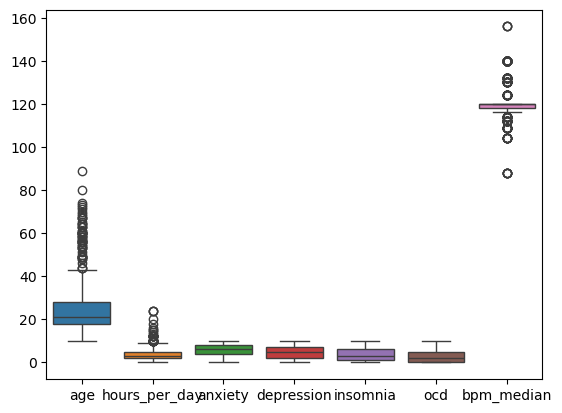

In [48]:
sns.boxplot(df_mxmh)

No more horrible outliers

age & hours_per_day cols are within acceptable ranges

## Null values

In [50]:
#total nulls

df_mxmh.isnull().sum().sum()

22

Only 22 total nulls (could have multiple nulls in same row), worth it to just drop them?

In [51]:
#total number of rows with any null
len(df_mxmh) - len(df_mxmh.dropna())

18

In [52]:
#Total rows check (what % are the nulls of the whole dataset)

print('# of rows:', len(df_mxmh.index))
print('# of null rows:', len(df_mxmh) - len(df_mxmh.dropna()))
print('% of null rows:', round(((len(df_mxmh) - len(df_mxmh.dropna())) / len(df_mxmh.index))*100, 2), '%')

# of rows: 736
# of null rows: 18
% of null rows: 2.45 %


In [ ]:
#nulls per column
df_mxmh.isnull().sum().sort_values(ascending=False)

### Null plan:
Drop all rows with null, since < 3% of data

#### Impute for BPM column

    Not doing anymore since replaced bpm col with median value for each genre

#Code-Cell -converted to markdown cell since this code not needed anymore, keeping for looking back at examples of what I tried

#looking at mean & other descriptive stats of bpm per fav_genre
df_mxmh.groupby(by='fav_genre', dropna=False)['bpm'].describe().T

____
#Code-Cell -converted to markdown cell since this code not needed anymore, keeping for looking back at examples of what I tried

#AP: Made two lists of the fav_genre values and the mean bpm for each genre

fav_genre_list = list(df_mxmh['fav_genre'].unique())
print(fav_genre_list)

means_genres = []
for g in fav_genre_list:
    means_genres.append(df_mxmh[df_mxmh['fav_genre'] == g].bpm.mean())
print(means_genres)

#AP: Made a dict of the two genre & mean bpms lFileExistsError

genre_bpm = dict(zip(fav_genre_list, means_genres))
print(genre_bpm)

____
#Code-Cell -converted to markdown cell since this code not needed anymore, keeping for looking back at examples of what I tried

#AP: fillna per fav_genre in bpm column

for g, b in genre_bpm.items():
        #mean_bpm = df_mxmh[df_mxmh['fav_genre'] == g].bpm.mean()
        #df_mxmh[df_mxmh['fav_genre'] == g].bpm.fillna(value = b, inplace=True)
        df_mxmh[df_mxmh['fav_genre'] == g].bpm.replace(to_replace = 'NaN', value = b, inplace=True)

df_mxmh.isnull().sum().sort_values(ascending=False)
____

#Code-Cell -converted to markdown cell since this code not needed anymore, keeping for looking back at examples of what I tried

#Calculate mean BPM for each genre

genre_means = df_mxmh.groupby('fav_genre')['bpm'].mean()
print(genre_means)
genre_means = genre_means.map('{:2f}'.format)
#print(f'{genre_means:.2f}')
print(genre_means)

#Code-Cell -converted to markdown cell since this code not needed anymore, keeping for looking back at examples of what I tried

#Calculate mean BPM for each genre

genre_means = df_mxmh.groupby('fav_genre')['bpm'].median()
genre_means

#Code-Cell -converted to markdown cell since this code not needed anymore, keeping for looking back at examples of what I tried

#Define a function to impute null values based on the mean of each genre

def impute_bpm(row):
    if pd.isnull(row['bpm']):
        return genre_means[row['fav_genre']]
    else:
        return row['bpm']

#Code-Cell -converted to markdown cell since this code not needed anymore, keeping for looking back at examples of what I tried

#Apply the function to the DataFrame

df_mxmh['bpm'] = df_mxmh.apply(impute_bpm, axis=1)
df_mxmh

In [54]:
#AP: drop all rows with nulls, and reset index

print('df before shape:', df_mxmh.shape)

df_mxmh.dropna(axis=0, how='any', inplace=True, ignore_index=True)

print('df after shape:', df_mxmh.shape)

df before shape: (736, 31)
df after shape: (718, 31)


In [55]:
#Total rows check (what % are the nulls of the whole dataset)

print('# of rows:', len(df_mxmh.index))
print('# of null rows:', len(df_mxmh) - len(df_mxmh.dropna()))
print('% of null rows:', round(((len(df_mxmh) - len(df_mxmh.dropna())) / len(df_mxmh.index))*100, 2), '%')

# of rows: 718
# of null rows: 0
% of null rows: 0.0 %


## Fix inconsistencies
    i.e. Mental health rankins have some decimals (5.5) instead of all integers
    hours_per_day round to whole numbers
        round 1.5h to 2h & 2.5h to 3h

In [56]:
df_mxmh[['anxiety', 'depression', 'insomnia', 'ocd', 'music_effects']] = df_mxmh[['anxiety', 'depression', 'insomnia', 'ocd', 'music_effects']].round(0)

In [57]:
df_mxmh['hours_per_day'].replace(1.5, 2, inplace=True)
df_mxmh['hours_per_day'].replace(2.5, 3, inplace=True)
df_mxmh['hours_per_day'].replace(4.5, 5, inplace=True)
df_mxmh['hours_per_day'].value_counts(dropna=False).sort_index(ascending=True)

C:\Users\apez9\AppData\Local\Temp\ipykernel_8808\2513690568.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mxmh['hours_per_day'].replace(1.5, 2, inplace=True)
C:\Users\apez9\AppData\Local\Temp\ipykernel_8808\2513690568.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

hours_per_day
0.00       5
0.10       1
0.25       3
0.50      20
0.70       1
1.00     115
2.00     184
3.00     120
4.00      83
5.00      54
6.00      47
7.00      15
8.00      29
9.00       3
10.00     20
11.00      1
12.00      8
14.00      1
15.00      2
16.00      1
18.00      1
20.00      1
24.00      3
Name: count, dtype: int64

In [59]:
list(df_mxmh.columns)

['age',
 'primary_streaming_service',
 'hours_per_day',
 'while_working',
 'instrumentalist',
 'composer',
 'fav_genre',
 'exploratory',
 'foreign_languages',
 'frequency_[classical]',
 'frequency_[country]',
 'frequency_[edm]',
 'frequency_[folk]',
 'frequency_[gospel]',
 'frequency_[hip_hop]',
 'frequency_[jazz]',
 'frequency_[k_pop]',
 'frequency_[latin]',
 'frequency_[lofi]',
 'frequency_[metal]',
 'frequency_[pop]',
 'frequency_[r&b]',
 'frequency_[rap]',
 'frequency_[rock]',
 'frequency_[video_game_music]',
 'anxiety',
 'depression',
 'insomnia',
 'ocd',
 'music_effects',
 'bpm_median']

In [64]:
genre_median.sort_values()

fav_genre
Gospel               88.0
Lofi                104.0
Country             109.0
Hip hop             112.0
Folk                114.0
R&B                 116.0
Classical           118.0
Jazz                120.0
Pop                 120.0
Rock                120.0
Video game music    120.0
K pop               124.0
Rap                 130.0
EDM                 132.0
Metal               140.0
Latin               156.0
Name: bpm, dtype: float64

In [62]:
df_mxmh.nunique(dropna=False)

age                             61
primary_streaming_service        6
hours_per_day                   23
while_working                    2
instrumentalist                  2
composer                         2
fav_genre                       16
exploratory                      2
foreign_languages                2
frequency_[classical]            4
frequency_[country]              4
frequency_[edm]                  4
frequency_[folk]                 4
frequency_[gospel]               4
frequency_[hip_hop]              4
frequency_[jazz]                 4
frequency_[k_pop]                4
frequency_[latin]                4
frequency_[lofi]                 4
frequency_[metal]                4
frequency_[pop]                  4
frequency_[r&b]                  4
frequency_[rap]                  4
frequency_[rock]                 4
frequency_[video_game_music]     4
anxiety                         11
depression                      11
insomnia                        11
ocd                 

## Convert numerical cols to categorical
    Majority of features are categorical, and the numerical cols aren't truly continuous
    ex. convert ages to age ranges (age of 21 would be converted to 20-25 (or similar))

In [ ]:
list(df_mxmh.columns)

In [ ]:
df_mxmh.nunique()
#Easy visuall for determinging categorical cols
#showed me that there were inconsistencies in the mental health cols (fixed above)

In [ ]:
#Help me to determing best grouping for the numerical cols during categorical conversion & also be able to do a double check on the cat cols

for col in df_mxmh.columns:
    print(f'{col} value_counts:\n\n{df_mxmh[col].value_counts(dropna=False).sort_index(ascending=False)}\n')

Groupings:

age: custom groups to reflect granularity within certain age groups
    
    - the ages below 33yrs is greater than the combined 33+ yrs

hours_per_day: convert to int dtype (gets rid of the decimals that can affect categorical graphing)

bpm (supposed to be avg bpm per each fav_genre)
- I want to look at the descriptive stats for each genre to decide if imputing mean, meadian, mode, a range or other makes the most sense

In [ ]:
#list of the numerical cols (based on number of unique values)
cols_num = [c for c in df_mxmh.columns if df_mxmh[c].nunique() > 16]
cols_num

### age col

In [ ]:
age_group_labels = ['0-13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33-35', '36-40', '41-45', '46-55', '56-65', '66-89']

age_group_bins = [0,13,14,15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35,40,45,55,65,90]

df_mxmh['age_group'] = pd.cut(x=df_mxmh['age'], bins=age_group_bins, labels=age_group_labels)
df_mxmh[['age_group']].value_counts(dropna=False).sort_index()

### hours_per_day col

In [ ]:
df_mxmh['hours_per_day'] = df_mxmh['hours_per_day'].astype('int')
df_mxmh['hours_per_day'].value_counts().sort_index()

### bpm col

In [ ]:
df_mxmh.groupby('fav_genre')['bpm'].describe()

#### With the ranges of bpm per genre, I would like to know how the bpm of the fav_genre was determined during data collection. Is it as reported by the survey responder or calculated by the survey creator?

Moving forward with replacing 

In [ ]:
genre_means

In [ ]:
genre_means_only = round(genre_means, 0)
genre_means_only = [int(i) for i in genre_means]
print(genre_means_only)

genre_list = list(df_mxmh['fav_genre'].unique())
print(genre_list)

In [ ]:
for g in genre_list:
    for i in genre_means_only:
        df_mxmh[df_mxmh['fav_genre'] == g]['bpm'] = i

In [ ]:
df_mxmh.groupby('fav_genre')['bpm'].describe()

In [ ]:
def mean_bpm_genre(row, genre):
    if row['fav_genre']==genre):
        return genre_means[row['fav_genre']]
    else:
        return row['bpm']

AP: Now the dataframe is ready for analysis & storytelling

# Next Section